What proportion of TV shows on TMDB are classified as mystery?

I am going to gather 100 samples of 10 movies in order to find the proportion of TV shows that are classified as Mystery

🎬 Collecting sample 1/100...
🎬 Collecting sample 2/100...
🎬 Collecting sample 3/100...
🎬 Collecting sample 4/100...
🎬 Collecting sample 5/100...
🎬 Collecting sample 6/100...
🎬 Collecting sample 7/100...
🎬 Collecting sample 8/100...
🎬 Collecting sample 9/100...
🎬 Collecting sample 10/100...
🎬 Collecting sample 11/100...
🎬 Collecting sample 12/100...
🎬 Collecting sample 13/100...
🎬 Collecting sample 14/100...
🎬 Collecting sample 15/100...
🎬 Collecting sample 16/100...
🎬 Collecting sample 17/100...
🎬 Collecting sample 18/100...
🎬 Collecting sample 19/100...
🎬 Collecting sample 20/100...
🎬 Collecting sample 21/100...
🎬 Collecting sample 22/100...
🎬 Collecting sample 23/100...
🎬 Collecting sample 24/100...
🎬 Collecting sample 25/100...
🎬 Collecting sample 26/100...
🎬 Collecting sample 27/100...
🎬 Collecting sample 28/100...
🎬 Collecting sample 29/100...
🎬 Collecting sample 30/100...
🎬 Collecting sample 31/100...
🎬 Collecting sample 32/100...
🎬 Collecting sample 33/100...
🎬 Collecting sample

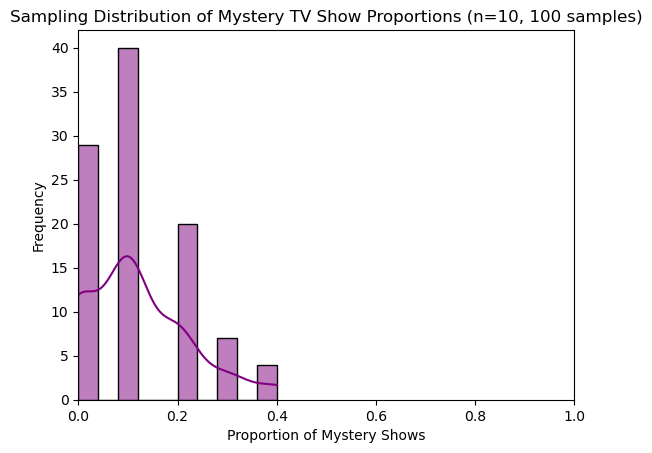

In [5]:
import requests
import pandas as pd
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt

API_KEY = "e60bf5d10ffaceb9ad099377c20a9924"
BASE_URL = "https://api.themoviedb.org/3"

def get_unique_random_tv_shows(n=10, max_pages=50):
    """Return a dataframe of n random TV shows."""
    shows, seen = [], set()
    
    while len(shows) < n:
        page = random.randint(1, max_pages)
        url = f"{BASE_URL}/discover/tv?api_key={API_KEY}&language=en-US&page={page}"
        r = requests.get(url)

        if r.status_code != 200:
            print(f"⚠️ API error {r.status_code}, retrying...")
            time.sleep(0.5)
            continue

        data = r.json()
        if "results" not in data:
            print("⚠️ Unexpected response (no results):", data)
            time.sleep(0.5)
            continue

        for show in data["results"]:
            if show["id"] not in seen:
                seen.add(show["id"])
                shows.append({
                    "id": show["id"],
                    "name": show["name"],
                    "genre_ids": show["genre_ids"],
                    "popularity": show.get("popularity", None),
                    "vote_average": show.get("vote_average", None),
                    "vote_count": show.get("vote_count", None)
                })
                if len(shows) >= n:
                    break
        time.sleep(0.2)

    return pd.DataFrame(shows)

def collect_sample_proportions(num_samples=100, sample_size=10):
    proportions = []

    for i in range(num_samples):
        print(f"🎬 Collecting sample {i+1}/{num_samples}...")
        df_sample = get_unique_random_tv_shows(sample_size)
        
        df_sample["is_mystery"] = df_sample["genre_ids"].apply(lambda ids: 9648 in ids)
        
        p_hat = df_sample["is_mystery"].mean()
        proportions.append(p_hat)
        
        time.sleep(0.3) 

    df_props = pd.DataFrame({
        "sample": range(1, len(proportions) + 1),
        "proportion_mystery": proportions
    })
    return df_props

df_props = collect_sample_proportions(num_samples=100, sample_size=10)

empirical_mean = df_props["proportion_mystery"].mean()
empirical_std = df_props["proportion_mystery"].std()

print(f"Empirical Mean: {empirical_mean:.4f}")
print(f"Empirical Standard Deviation: {empirical_std:.4f}")

print("\n✅ Sampling complete!")
print(df_props.head())
print(f"\nMean sample proportion of Mystery shows: {df_props['proportion_mystery'].mean():.3f}")

sns.histplot(df_props["proportion_mystery"], bins=10, kde=True, color="purple")
plt.title("Sampling Distribution of Mystery TV Show Proportions (n=10, 100 samples)")
plt.xlabel("Proportion of Mystery Shows")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.show()


As you can see from the graph above, the distribution is skewed to the right and is therefore not a normal distribution, so any conclusion should be taken with a grain of salt. The empirical mean of the sampling distribution is about 0.117, and the empirical standard deviation is 0.1055. Based on the data gathered, the proportion of mystery movies seems to be at 0.4 or below, since it never gets above 0.4. This suggests that most of the samples I gathered did had little to no Mystery shows at all, which shows that Mystery shows are a small percentage of TV Shows on TMDB overall, with about 11.7 percent of shows being Mystery. 